In [2]:
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import osmnx as ox
import os
import glob
from tqdm import tqdm
import numpy as np
from scipy.stats import gaussian_kde

In [3]:
# Read from the plt file
def read_plt(plt_file):
    points = pd.read_csv(plt_file, skiprows=6, header=None)
    points.columns = ['lat', 'lon', 'none', 'alt', 'days_past', 'date', 'time']
    return points

def read_all_plt_files(driver = '000'):
    plt_files = glob.glob(f'../data/geolife/Data/{driver}/Trajectory/*.plt')
    plt_files.sort()
    df = pd.concat([read_plt(plt_file) for plt_file in plt_files])
    return df

# Data cleaning
# Field 1: Latitude in decimal degrees.
# Field 2: Longitude in decimal degrees.
# Field 3: All set to 0 for this dataset.
# Field 4: Altitude in feet (-777 if not valid).
# Field 5: Date - number of days (with fractional part) that have passed since 12/30/1899.
# Field 6: Date as a string.
# Field 7: Time as a string.

# Example 1. Read a single plt file
# df = read_plt('../data/geolife/Data/000/Trajectory/20081023025304.plt')
# print("Lenght of the data: ", len(df))

# Example 2. Read all plt files from the directory Data/XXX/Trajectory, Represents drivr 000
df = read_all_plt_files()
print("Lenght of the data: ", len(df))
print(df.head())

Lenght of the data:  173870
         lat         lon  none  alt     days_past        date      time
0  39.984702  116.318417     0  492  39744.120185  2008-10-23  02:53:04
1  39.984683  116.318450     0  492  39744.120255  2008-10-23  02:53:10
2  39.984686  116.318417     0  492  39744.120313  2008-10-23  02:53:15
3  39.984688  116.318385     0  492  39744.120370  2008-10-23  02:53:20
4  39.984655  116.318263     0  492  39744.120428  2008-10-23  02:53:25


/var/folders/xs/8ytvq8397bz3p0mp2cdjyd_40000gn/T/ipykernel_67049/2230285894.py:2: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  beijing_road = ox.graph_from_bbox(40.05, 39.83, 116.62, 116.17, network_type='drive')
/var/folders/xs/8ytvq8397bz3p0mp2cdjyd_40000gn/T/ipykernel_67049/2230285894.py:2: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  beijing_road = ox.graph_from_bbox(40.05, 39.83, 116.62, 116.17, network_type='drive')


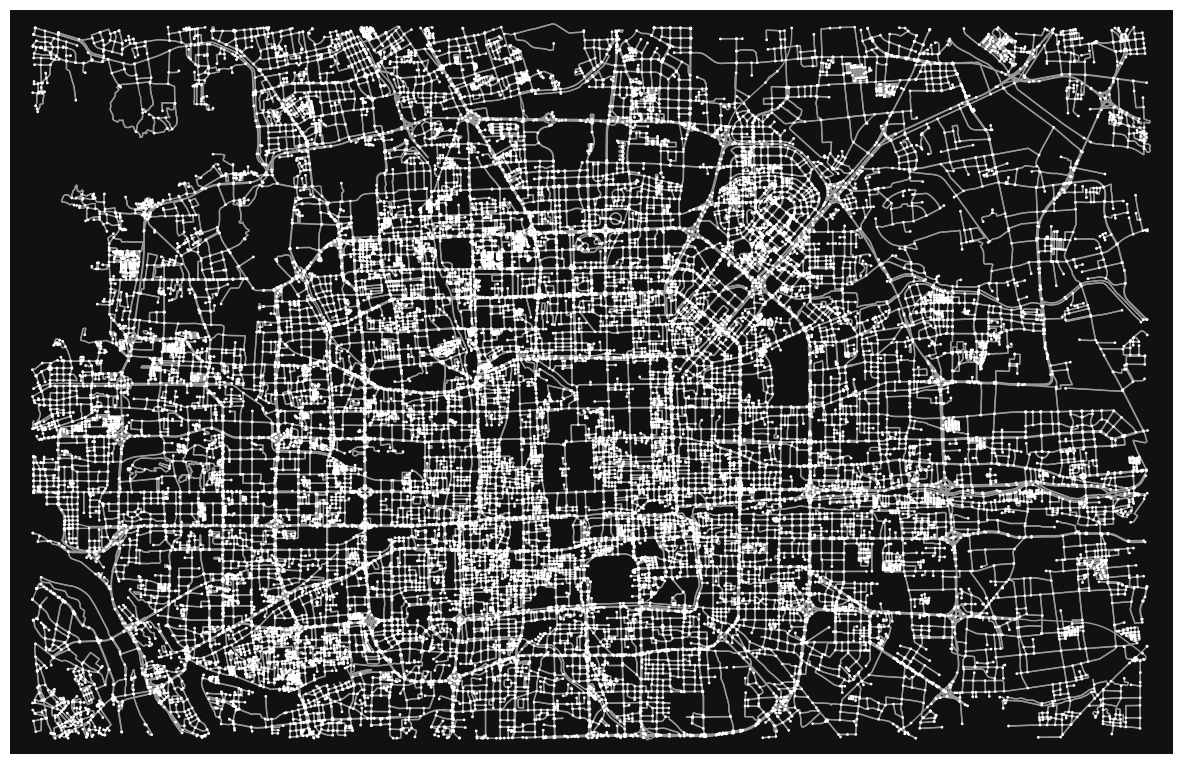

In [10]:
# Using OSMnx to download the road network of Beijing
beijing_road = ox.graph_from_bbox(40.05, 39.83, 116.62, 116.17, network_type='drive')
fig, ax = ox.plot_graph(beijing_road, figsize=(15,15), show=False, close=False, node_size=4)
plt.show()

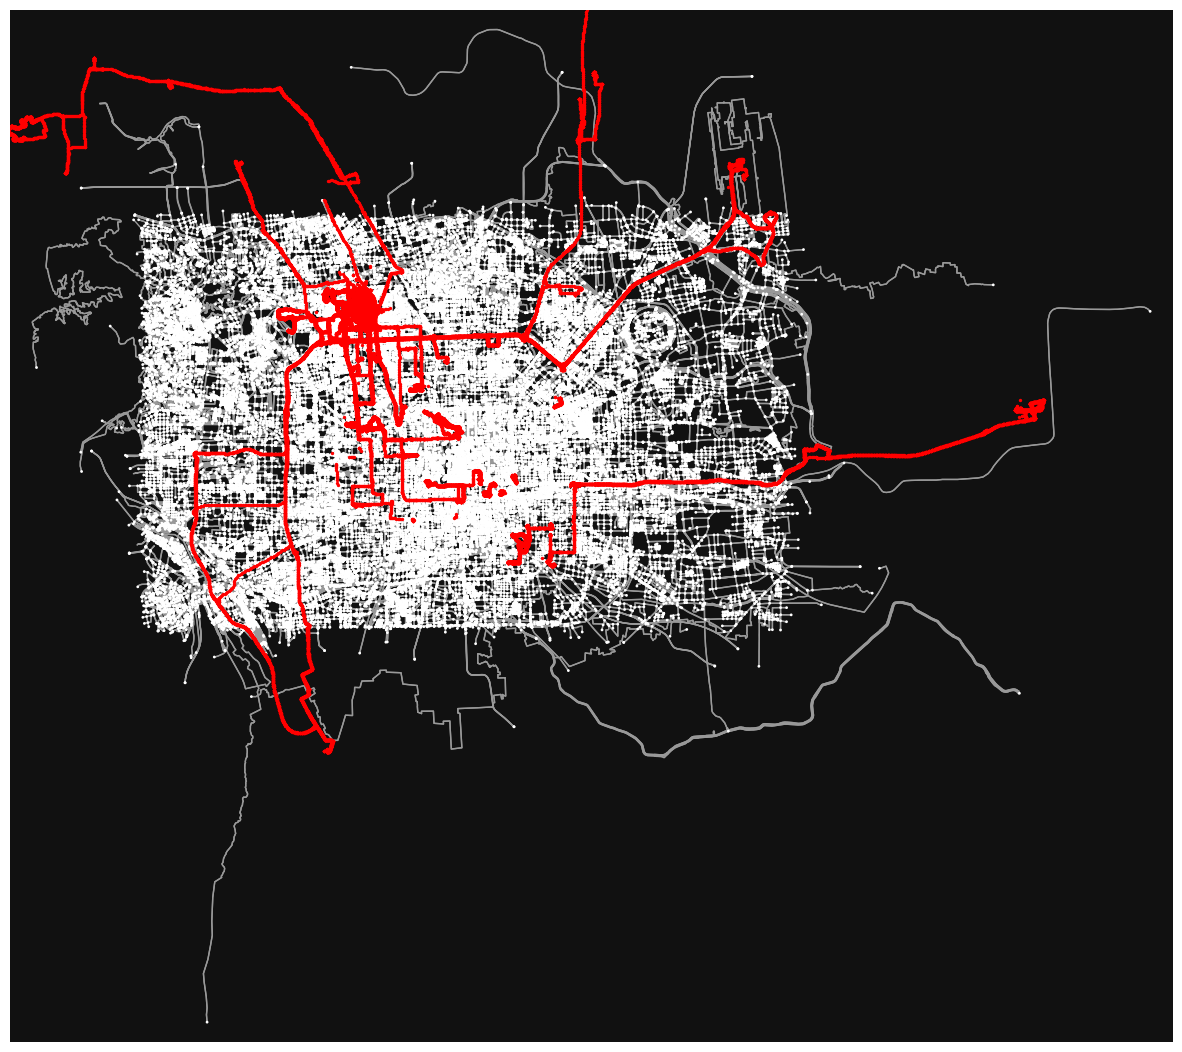

In [9]:
# Load the road network of Beijing from the osm xml file
beijing_road = ox.graph_from_xml(filepath='../maps/beijing-20240908-comp.osm')
print(beijing_road)
fig, ax = ox.plot_graph(beijing_road, figsize=(15,15), show=False, close=False, node_size=4)
# Plot the trajectory
ax.scatter(df['lon'], df['lat'], c='r', s=2)

plt.show()

In [ ]:

# Use folium
beijing_folium = folium.Map(location=[39.9, 116.4], zoom_start=12)
HeatMap(data=df[['lat', 'lon']], radius=5).add_to(beijing_folium)
# beijing_folium.save('beijing.html')
# Save the plot

# plt.show()